In [1]:
import os
import torch
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('..')
from data.loader import load_testing
os.chdir('performance_evaluation')

In [2]:
# Load predictions for testing data
y_preds = torch.load("y_pred_test.pt")
print(y_preds.shape)

# Turn predictions into labels
y_preds_labels = torch.argmax(y_preds, dim=1)
y_preds_labels.shape

torch.Size([10578, 5])


torch.Size([10578])

In [3]:
# Load testing data
os.chdir('..')
X_test, y_test = load_testing()
os.chdir('performance_evaluation')
X_test.shape, y_test.shape

Use this function only for the very final evaluation before the competition ends.


((10578, 32, 96), (10578,))

In [4]:
label_categories = {0: 'Other',
                    1: 'Music',
                    2: 'Human voice',
                    3: 'Engines',
                    4: 'Alarm'}

Test accuracy: 0.902060881073927
test f1-score: 0.8326507794262031


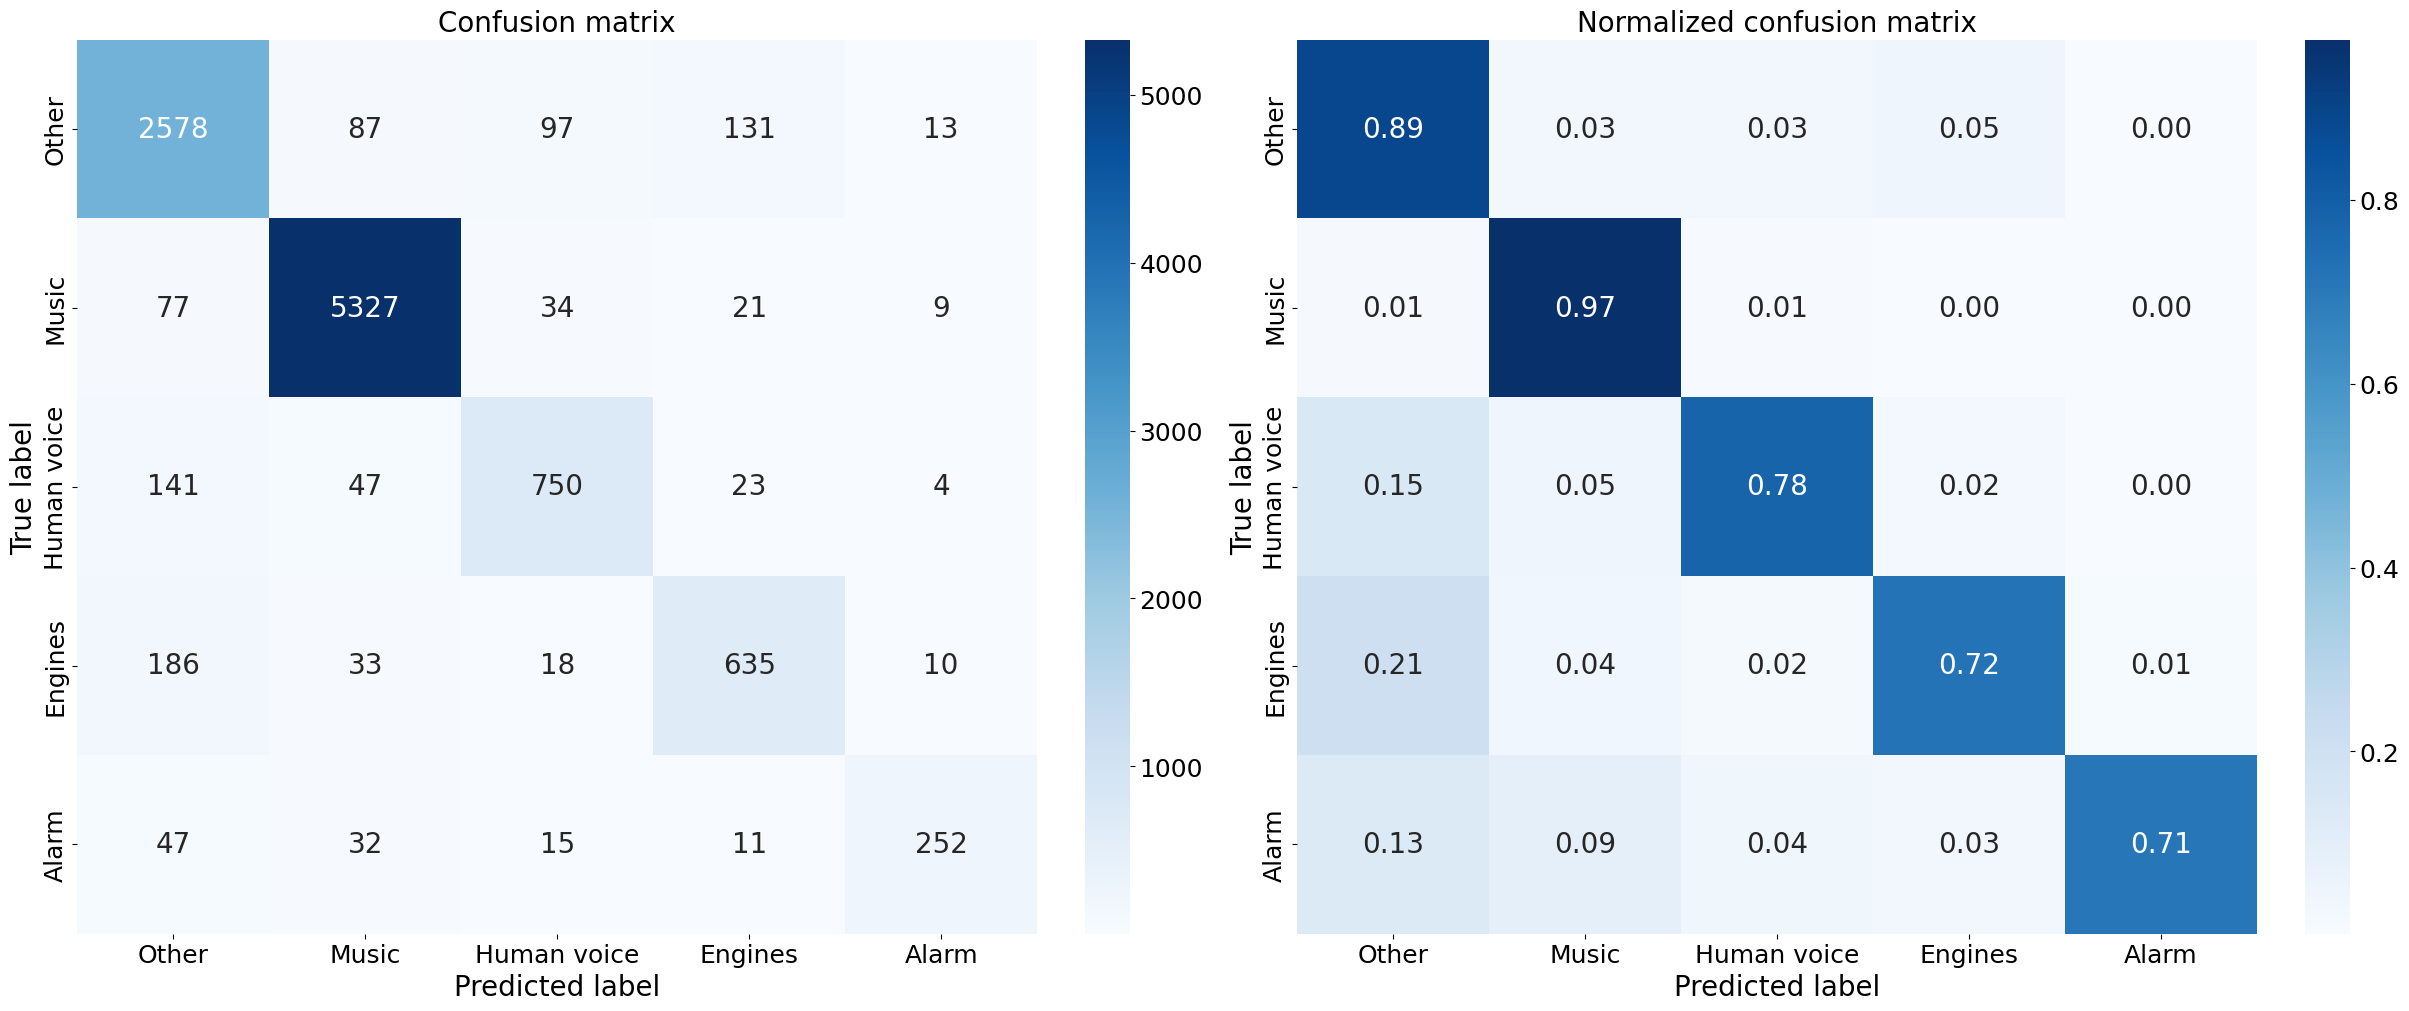

In [5]:
# Get test accuracy and F1 score
print(f"Test accuracy: {accuracy_score(y_test, y_preds_labels)}")
print(f"test f1-score: {f1_score(y_test, y_preds_labels, average='macro')}")

# Plot confusion matrix
fig, axs = plt.subplots(1, 2, figsize=(24, 10), constrained_layout=True)
cm = confusion_matrix(y_test, y_preds_labels)
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axs[0], annot_kws={"size": 20})
axs[0].set_title("Confusion matrix", fontsize=20)
axs[0].set_ylabel("True label", fontsize=20)
axs[0].set_xlabel("Predicted label", fontsize=20)
axs[0].set_xticklabels(label_categories.values(), fontsize=18)
axs[0].set_yticklabels(label_categories.values(), fontsize=18)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=18)

# Plot normalized confusion matrix
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues", ax=axs[1], annot_kws={"size": 20})
axs[1].set_title("Normalized confusion matrix", fontsize=20)
axs[1].set_ylabel("True label", fontsize=20)
axs[1].set_xlabel("Predicted label", fontsize=20)
axs[1].set_xticklabels(label_categories.values(), fontsize=18)
axs[1].set_yticklabels(label_categories.values(), fontsize=18)
cax = ax.figure.axes[-1]
cax.tick_params(labelsize=18)

plt.savefig("confusion_matrix.png")
plt.show()